In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Dense
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image


In [ ]:
Train_Datagen=ImageDataGenerator(
                              rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True
                              )

Test_Datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
Train_Dataset=Train_Datagen.flow_from_directory(
                                                "C:/Users/shamanth/Desktop/ExcelR/Dataset/Solar_Panel_DataSet",
                                                target_size=(200,200),
                                                batch_size=10,
                                                class_mode='binary'
                                                )

Found 128 images belonging to 2 classes.


In [ ]:
Test_Dataset=Test_Datagen.flow_from_directory(
                                                "C:/Users/shamanth/Desktop/ExcelR/Dataset/Solar_Panel_DataSet",
                                                target_size=(200,200),
                                                batch_size=10,
                                                class_mode='binary'
                                                )

Found 128 images belonging to 2 classes.


In [ ]:
Train_Dataset.class_indices

{'Faulty': 0, 'Good': 1}

In [ ]:
Test_Dataset.class_indices

{'Faulty': 0, 'Good': 1}

In [ ]:
len(Train_Dataset.classes)

128

In [ ]:
Train_Dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cnn=tf.keras.Sequential()

In [ ]:
cnn.add(Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',strides=2,input_shape=[200,200,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(Conv2D(filters=32,padding='same',kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(1,kernel_regularizer=l2(0.01),activation='linear'))


In [ ]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 20000)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [ ]:
cnn.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

In [ ]:
run=cnn.fit(x=Train_Dataset,validation_data=Test_Dataset,epochs=30)

Epoch 1/30
13/13 [==============================] - 6s 331ms/step - loss: 1.2420 - accuracy: 0.5938 - val_loss: 0.8988 - val_accuracy: 0.6094
Epoch 2/30
13/13 [==============================] - 3s 214ms/step - loss: 0.8177 - accuracy: 0.6094 - val_loss: 0.6976 - val_accuracy: 0.6094
Epoch 3/30
13/13 [==============================] - 3s 215ms/step - loss: 0.6750 - accuracy: 0.6797 - val_loss: 0.4851 - val_accuracy: 0.7344
Epoch 4/30
13/13 [==============================] - 2s 175ms/step - loss: 0.6773 - accuracy: 0.7422 - val_loss: 0.5069 - val_accuracy: 0.7344
Epoch 5/30
13/13 [==============================] - 2s 159ms/step - loss: 0.5647 - accuracy: 0.7891 - val_loss: 0.5058 - val_accuracy: 0.7344
Epoch 6/30
13/13 [==============================] - 2s 167ms/step - loss: 0.5265 - accuracy: 0.7578 - val_loss: 0.4650 - val_accuracy: 0.7656
Epoch 7/30
13/13 [==============================] - 2s 181ms/step - loss: 0.4329 - accuracy: 0.8125 - val_loss: 0.3842 - val_accuracy: 0.8125
Epoch 

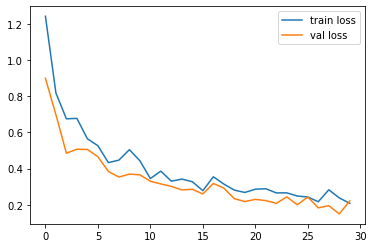

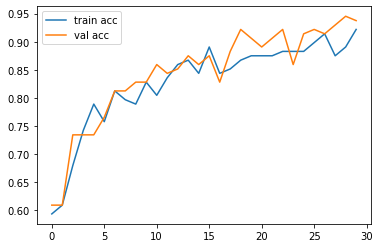

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(run.history['loss'], label='train loss')
plt.plot(run.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(run.history['accuracy'], label='train acc')
plt.plot(run.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_Solar_Panel_Prediction.h5')

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_Solar_Panel_Prediction.h5')

In [ ]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 20000)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:/Users/Akash Kundu/Desktop/ExcelR/Dataset/Test/image46.jpg", target_size = (200,200))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

array([[1.7832109]], dtype=float32)

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:/Users/shamanth/Desktop/ExcelR/Dataset/Test/images134.jpg", target_size = (200,200))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

array([[-2.1146054]], dtype=float32)

In [ ]:
import os

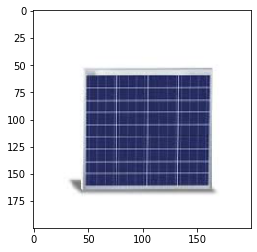

Solar Pannel is Not fault


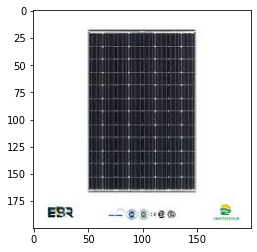

Solar Pannel is Not fault


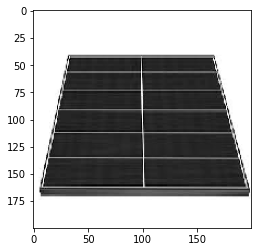

Solar Pannel is Not fault


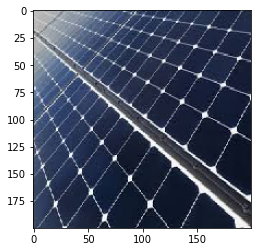

Solar Cell is Fault


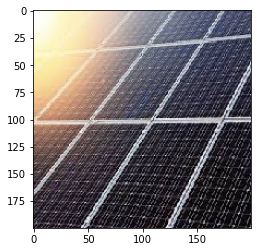

Solar Cell is Fault


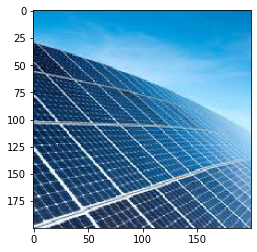

Solar Pannel is Not fault


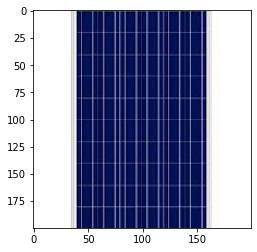

Solar Cell is Fault


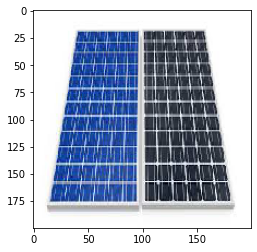

Solar Pannel is Not fault


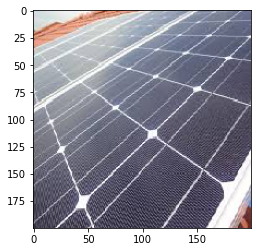

Solar Cell is Fault


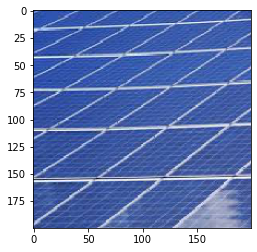

Solar Pannel is Not fault


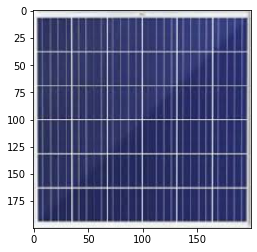

Solar Pannel is Not fault


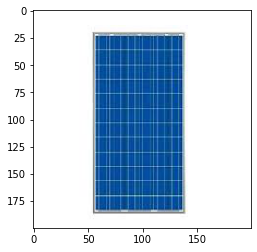

Solar Pannel is Not fault


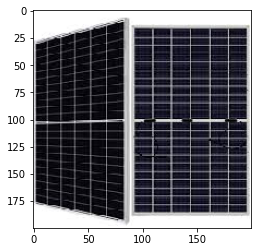

Solar Cell is Fault


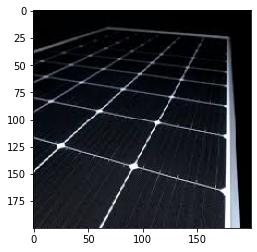

Solar Pannel is Not fault


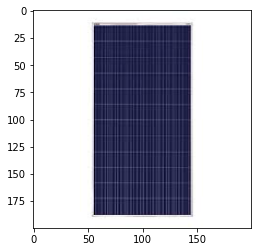

Solar Pannel is Not fault


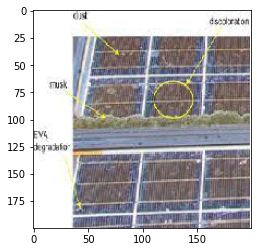

Solar Cell is Fault


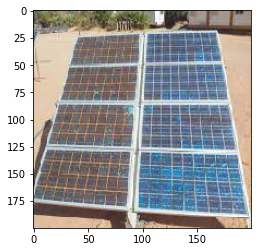

Solar Cell is Fault


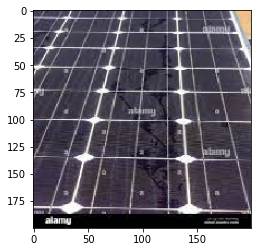

Solar Cell is Fault


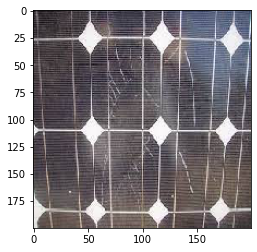

Solar Cell is Fault


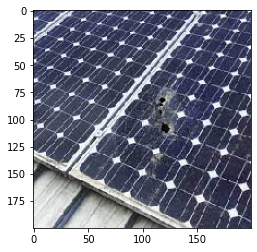

Solar Pannel is Not fault


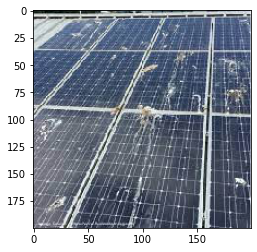

Solar Cell is Fault


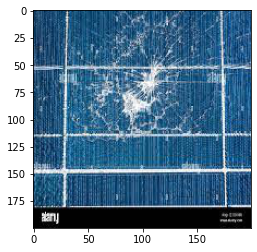

Solar Cell is Fault


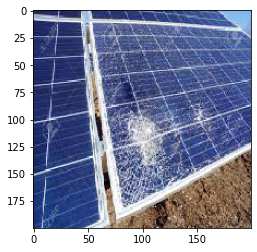

Solar Pannel is Not fault


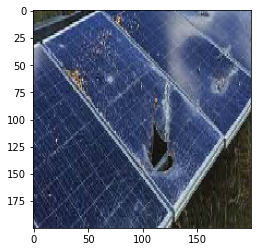

Solar Cell is Fault


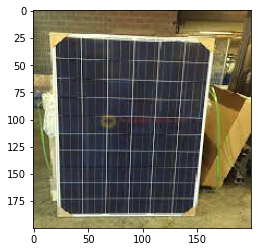

Solar Pannel is Not fault


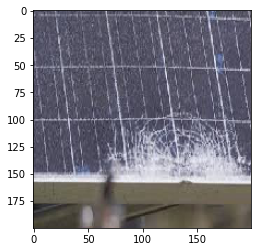

Solar Cell is Fault


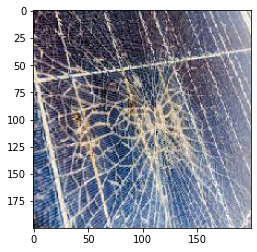

Solar Cell is Fault


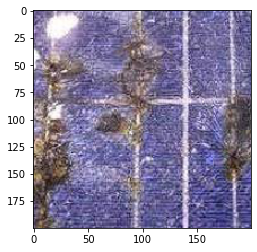

Solar Cell is Fault


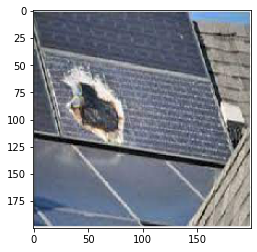

Solar Pannel is Not fault


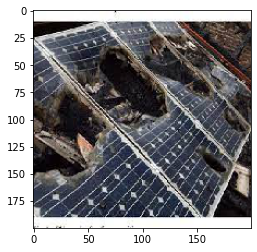

Solar Pannel is Not fault


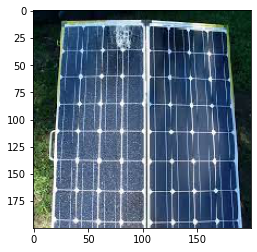

Solar Cell is Fault


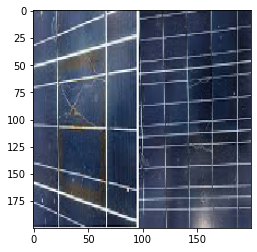

Solar Cell is Fault


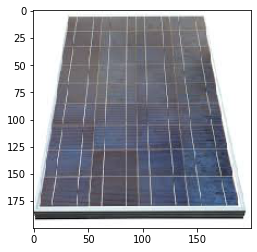

Solar Pannel is Not fault


In [ ]:
dir_path = "C:/Users/shamanth/Desktop/ExcelR/Dataset/Test"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    
    val= model.predict(images)
    if val < 0:
        print("Solar Cell is Fault")
    else:
        print("Solar Pannel is Not fault")

In [ ]:
data_augmentation =Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(200, 
                                                              200,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
cnn=tf.keras.Sequential()
cnn.add(Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',strides=2,input_shape=[200,200,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(Conv2D(filters=32,padding='same',kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(1,kernel_regularizer=l2(0.01),activation='linear'))

In [ ]:
cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 20000)             0         
                                                                 
 dense_14 (Dense)            (None, 128)             

In [ ]:
cnn.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

In [ ]:
run=cnn.fit(x=Train_Dataset,validation_data=Test_Dataset,epochs=30)

Epoch 1/30
13/13 [==============================] - 4s 240ms/step - loss: 1.3233 - accuracy: 0.5547 - val_loss: 0.5995 - val_accuracy: 0.6641
Epoch 2/30
13/13 [==============================] - 3s 229ms/step - loss: 0.5338 - accuracy: 0.7422 - val_loss: 0.4266 - val_accuracy: 0.8281
Epoch 3/30
13/13 [==============================] - 3s 208ms/step - loss: 0.5453 - accuracy: 0.7812 - val_loss: 0.4373 - val_accuracy: 0.7656
Epoch 4/30
13/13 [==============================] - 2s 191ms/step - loss: 0.4670 - accuracy: 0.8047 - val_loss: 0.3728 - val_accuracy: 0.8359
Epoch 5/30
13/13 [==============================] - 3s 200ms/step - loss: 0.4554 - accuracy: 0.8359 - val_loss: 0.5722 - val_accuracy: 0.7578
Epoch 6/30
13/13 [==============================] - 3s 203ms/step - loss: 0.5283 - accuracy: 0.7578 - val_loss: 0.3385 - val_accuracy: 0.8203
Epoch 7/30
13/13 [==============================] - 2s 190ms/step - loss: 0.4081 - accuracy: 0.8047 - val_loss: 0.2819 - val_accuracy: 0.8672
Epoch 

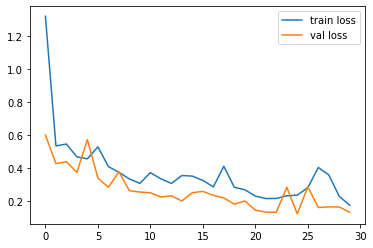

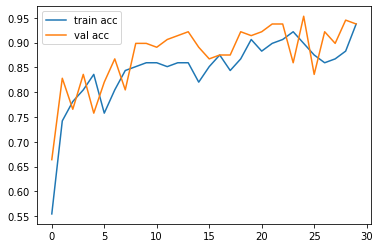

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(run.history['loss'], label='train loss')
plt.plot(run.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(run.history['accuracy'], label='train acc')
plt.plot(run.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
%%writefile Solar_Panel.py
import streamlit as st
import tensorflow as tf
import numpy as np 
from tensorflow.keras.preprocessing import image
import os
from PIL import Image,ImageOps

st.title("Solar Cell Fault Detection Making By Group 6")
upload_file = st.sidebar.file_uploader("Upload solar cell images")
generate_pred = st.sidebar.button("Detect_image")
model = tf.keras.models.load_model('model_Solar_Panel_Prediction.h5')
def import_n_pred(image_data , model):
    size = (200,200)
    image = ImageOps.fit(image_data,size,Image.ANTIALIAS)
    img = np.asarray(image)
    reshape = img[np.newaxis,...]
    val = model.predict(reshape)
    return val
  

if generate_pred:
    image = Image.open(upload_file)
    with st.beta_expander('image', expanded = True):
        st.image(image,use_column_width=True)
        
    val = import_n_pred(image,model)
    labels = ['Solar cell fault','Solar Panel is not fault']
    st.title("prediction of iamge is {}".format(labels[np.argmax(val)]))
        

Writing Solar_Panel.py


In [ ]:
!streamlit run Solar_Panel.py